In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'pair': 'BTC_ETH',
 'period': 300,
 'input_size': 120,
 'output_size': 10,
 'lstm_hidden_size': 200,
 'columns': ['Close', 'Volume', 'Low', 'High'],
 'csv_src_file': 'BTC_ETH',
 'name': 'lstm',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'filename': 'BTC_ETH_lstm_i120_o10_Close_Volume_Low_High'}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
 
#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1483228800]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
147395,0.008400,1483229100,0.008412,0.008373,0.008379,23.101541
147396,0.008450,1483229400,0.008463,0.008388,0.008400,42.334102
147397,0.008511,1483229700,0.008511,0.008444,0.008460,70.720062
147398,0.008522,1483230000,0.008522,0.008511,0.008511,7.221969
147399,0.008530,1483230300,0.008530,0.008522,0.008522,20.965740


In [3]:
values = dataset.loc[:,columns].values

In [4]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(120, 4, 10)

In [5]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-120),var2(t-120),var3(t-120),var4(t-120),var1(t-119),var2(t-119),var3(t-119),var4(t-119),var1(t-118),var2(t-118),...,var3(t+7),var4(t+7),var1(t+8),var2(t+8),var3(t+8),var4(t+8),var1(t+9),var2(t+9),var3(t+9),var4(t+9)
120,0.003928,0.003895,0.003878,0.003777,0.004276,0.007137,0.003985,0.004123,0.004701,0.011923,...,0.003703,0.003739,0.003733,0.001932,0.003760,0.003511,0.004033,0.005065,0.003857,0.003796
121,0.004276,0.007137,0.003985,0.004123,0.004701,0.011923,0.004377,0.004457,0.004778,0.001218,...,0.003760,0.003511,0.004033,0.005065,0.003857,0.003796,0.004130,0.012079,0.004118,0.004100
122,0.004701,0.011923,0.004377,0.004457,0.004778,0.001218,0.004852,0.004532,0.004832,0.003535,...,0.003857,0.003796,0.004130,0.012079,0.004118,0.004100,0.003907,0.004797,0.003906,0.003963
123,0.004778,0.001218,0.004852,0.004532,0.004832,0.003535,0.004929,0.004587,0.004832,0.002484,...,0.004118,0.004100,0.003907,0.004797,0.003906,0.003963,0.003824,0.000297,0.003942,0.003691
124,0.004832,0.003535,0.004929,0.004587,0.004832,0.002484,0.004762,0.004587,0.004833,0.000836,...,0.003906,0.003963,0.003824,0.000297,0.003942,0.003691,0.003858,0.000200,0.003963,0.003691
125,0.004832,0.002484,0.004762,0.004587,0.004833,0.000836,0.004984,0.004587,0.004833,0.001794,...,0.003942,0.003691,0.003858,0.000200,0.003963,0.003691,0.003872,0.000125,0.003998,0.003740
126,0.004833,0.000836,0.004984,0.004587,0.004833,0.001794,0.004984,0.004587,0.004832,0.000966,...,0.003963,0.003691,0.003872,0.000125,0.003998,0.003740,0.003858,0.000270,0.003998,0.003705
127,0.004833,0.001794,0.004984,0.004587,0.004832,0.000966,0.004852,0.004587,0.004624,0.002151,...,0.003998,0.003740,0.003858,0.000270,0.003998,0.003705,0.004290,0.003913,0.003998,0.004098
128,0.004832,0.000966,0.004852,0.004587,0.004624,0.002151,0.004720,0.004586,0.004729,0.003743,...,0.003998,0.003705,0.004290,0.003913,0.003998,0.004098,0.004409,0.005831,0.004140,0.004208
129,0.004624,0.002151,0.004720,0.004586,0.004729,0.003743,0.004774,0.004484,0.004795,0.000671,...,0.003998,0.004098,0.004409,0.005831,0.004140,0.004208,0.004346,0.001669,0.004440,0.004222


In [7]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

reframed.head()

,var1(t-120),var2(t-120),var3(t-120),var4(t-120),var1(t-119),var2(t-119),var3(t-119),var4(t-119),var1(t-118),var2(t-118),...,var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9)
120,0.003928,0.003895,0.003878,0.003777,0.004276,0.007137,0.003985,0.004123,0.004701,0.011923,...,0.004715,0.004029,0.003586,0.003866,0.004033,0.003684,0.003831,0.003636,0.003733,0.004033
121,0.004276,0.007137,0.003985,0.004123,0.004701,0.011923,0.004377,0.004457,0.004778,0.001218,...,0.004029,0.003586,0.003866,0.004033,0.003684,0.003831,0.003636,0.003733,0.004033,0.004130
122,0.004701,0.011923,0.004377,0.004457,0.004778,0.001218,0.004852,0.004532,0.004832,0.003535,...,0.003586,0.003866,0.004033,0.003684,0.003831,0.003636,0.003733,0.004033,0.004130,0.003907
123,0.004778,0.001218,0.004852,0.004532,0.004832,0.003535,0.004929,0.004587,0.004832,0.002484,...,0.003866,0.004033,0.003684,0.003831,0.003636,0.003733,0.004033,0.004130,0.003907,0.003824
124,0.004832,0.003535,0.004929,0.004587,0.004832,0.002484,0.004762,0.004587,0.004833,0.000836,...,0.004033,0.003684,0.003831,0.003636,0.003733,0.004033,0.004130,0.003907,0.003824,0.003858


In [8]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [9]:
# split into input and outputs
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_out:]
test_x, test_y = test[:, :n_obs], test[:, -n_out:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, 1)
test_y = test_y.reshape(-1, n_out, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(121252, 120, 4) (121252, 10, 1) (30313, 120, 4) (30313, 10, 1)


In [10]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint

units= CONFIG['lstm_hidden_size']
dropout = .8

# design network
model = Sequential()
model.add(Bidirectional(LSTM(units), input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(dropout))

model.add(RepeatVector(n_out))

model.add(LSTM(int(units/2), return_sequences=True))
model.add(Dropout(dropout))

# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mse', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 400)               328000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 400)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 100)           200400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 1)             101       
Total params: 528,501
Trainable params: 528,501
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=2
batch_size=64

In [13]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=False,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 121252 samples, validate on 30313 samples
Epoch 1/2
121252/121252 [==============================] - 640s 5ms/step - loss: 0.0020 - val_loss: 0.0174

Epoch 00001: val_loss improved from inf to 0.01736, saving model to weights/BTC_ETH_lstm_i120_o10_Close_Volume_Low_High_model_weights.h5
Epoch 2/2
121252/121252 [==============================] - 643s 5ms/step - loss: 0.0072 - val_loss: 0.0175

Epoch 00002: val_loss did not improve from 0.01736


In [14]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mse', optimizer='adam')
model.evaluate(test_x, test_y)

30313/30313 [==============================] - 91s 3ms/step


0.017359742047812973

In [15]:
from matplotlib import pyplot

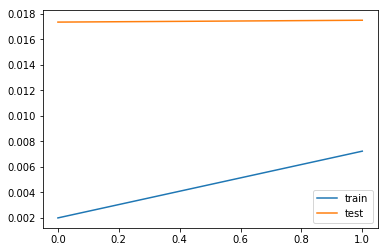

In [16]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# Test the prediction of test data
y = model.predict(test_x)

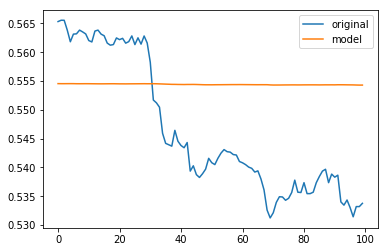

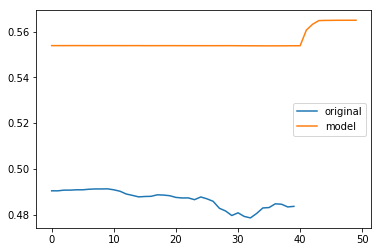

In [18]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

# Show how the model fits the test data
pyplot.plot(a[:100], label='original')
pyplot.plot(b[:100], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:], label='original')
pyplot.plot(c[pos:], label='model')
pyplot.legend()
pyplot.show()


In [19]:
#Prediction on public data!
period = CONFIG['period']
import time
from urllib.request import urlopen
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [20]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print (rt_x.shape)
    return rt_scaled, model.predict(rt_x)

(1, 120, 4)


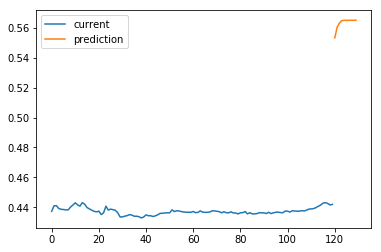

(1, 120, 4)


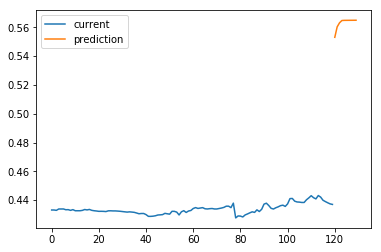

(1, 120, 4)


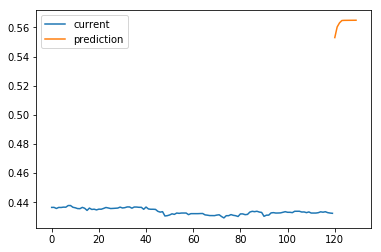

(1, 120, 4)


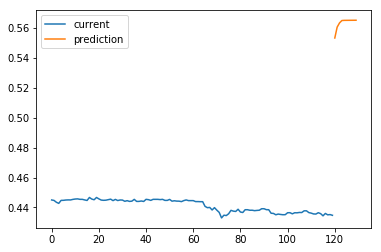

(1, 120, 4)


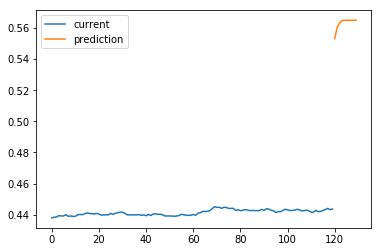

(1, 120, 4)


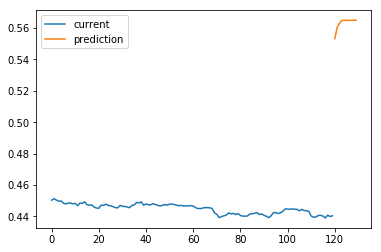

(1, 120, 4)


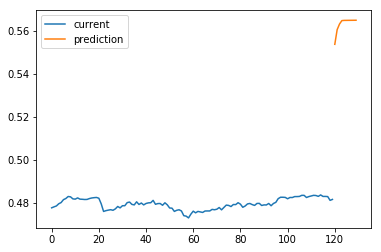

In [21]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

Sat, 30 Jun 2018 10:15:00 +0000
(1, 120, 4)


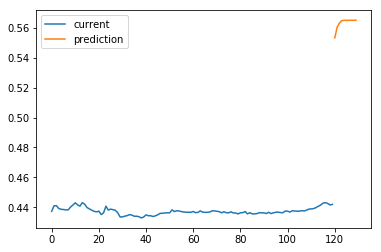

In [ ]:
#Prediction on live data!
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print (time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end)))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))